In [23]:
from keras.models import Sequential
from keras.layers import *
import keras
from keras.preprocessing import image
from matplotlib import pyplot as plt
import cv2

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)       

In [13]:
model.load_weights("/content/Covid-19_Weights.hdf5")

In [64]:
def AnalysingResults(QueryImage,ActualLabel,Model):
  # Preprocessing Image
  img = image.load_img(QueryImage)
  img = image.img_to_array(img)
  # Plotting Image
  plt.imshow(img/255.0)
  plt.axis("off")
  plt.show()
  # Reshaping
  img = cv2.resize(img,(224,224))
  img = img.reshape((1,224,224,3))
  
  #print(img.shape)

  PredictedLabel = Model.predict(img)
  
  if(PredictedLabel[0][0] >= 0.5):
    PredictedLabel = 1
  else:
    PredictedLabel = 0
  
  #print(PredictedLabel)
  
  if PredictedLabel == ActualLabel:
    print("Prediction is Correct")
  else:
    print("Prediction is Incorrect")
  if PredictedLabel == 0:
    print("Its a Covid X-ray")
  else:
    print("Its a Normal X-ray")

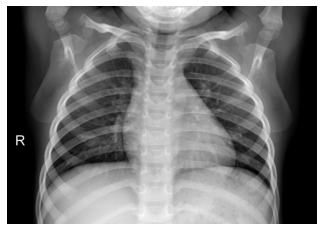

Prediction is Correct
Its a Normal X-ray


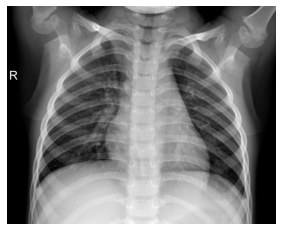

Prediction is Correct
Its a Normal X-ray


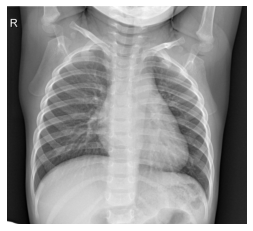

Prediction is Incorrect
Its a Covid X-ray


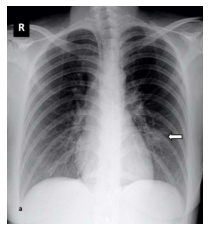

Prediction is Correct
Its a Covid X-ray


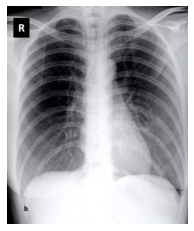

Prediction is Correct
Its a Covid X-ray


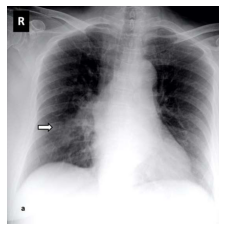

Prediction is Correct
Its a Covid X-ray


In [65]:
AnalysingResults("/content/IM-0216-0001.jpeg",1,model)
AnalysingResults("/content/IM-0266-0001.jpeg",1,model)
AnalysingResults("/content/IM-0403-0001.jpeg",1,model)
AnalysingResults("/content/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png",0,model)
AnalysingResults("/content/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png",0,model)
AnalysingResults("/content/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png",0,model)